In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nbodykit.lab as nb

In [2]:
p = '/home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/'
dpk = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json')

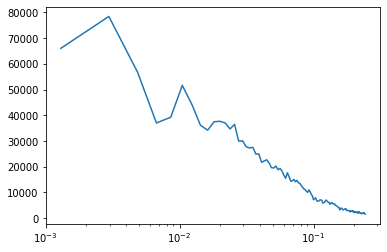

In [5]:
plt.plot(dpk.poles['k'], dpk.poles['power_0']-dpk.attrs['shotnoise'])
plt.xscale('log')

In [35]:
def json2txt(json, txt):
    
    dpk = nb.ConvolvedFFTPower.load(json)
    
    with open(txt, 'w') as f:

        # add header
        for attr, val in dpk.attrs.items():
            f.write(f'# {attr:21s}: {val}\n')

        nbin = dpk.poles['k'].size           
        k_ = dpk.poles.edges['k']
        ka_ = dpk.poles['k']
        p0_ = dpk.poles['power_0'].real
        p2_ = dpk.poles['power_2'].real
        
        # write spectra
        f.write('# kmin kavg P0 P2\n')        
        for i in range(nbin):
            f.write(f"{k_[i]:.6f} {ka_[i]:.6f} {p0_[i]:.6f} {p2_[i]:.6f}\n")
            
    plt.figure()
    plt.plot(ka_, p0_)
    plt.xscale('log')
    plt.show()
    
    print(f'wrote {json} to {txt}')

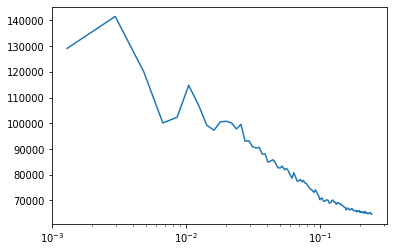

wrote /home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json to /home/mehdi/data/eboss/data/v7_2/3.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_2_main.txt


In [36]:
json2txt(f'{p}spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json', f'{p}spectra_NGC_knownsystot_mainhighz_512_v7_2_main.txt')

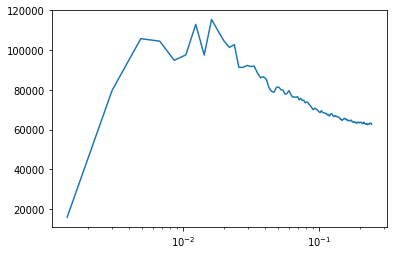

wrote /home/mehdi/data/eboss/mocks/1.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_0_0001_main.json to /home/mehdi/data/eboss/mocks/1.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_0_0001_main.txt


In [37]:
json2txt('/home/mehdi/data/eboss/mocks/1.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_0_0001_main.json', 
         '/home/mehdi/data/eboss/mocks/1.0/measurements/spectra/spectra_NGC_knownsystot_mainhighz_512_v7_0_0001_main.txt')